# Screener codice base

Architettura di un Bullish Hammer

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffn

In [3]:
ticker = "AAPL"
startdate = "2010-01-01"
enddate = "2020-07-31"

In [4]:
input_string = ticker + ":Open," + ticker + ":High," + ticker + ":Low," + \
               ticker + ":Close," + ticker + ":Volume"
input_string

'AAPL:Open,AAPL:High,AAPL:Low,AAPL:Close,AAPL:Volume'

In [5]:
dataset = ffn.get(input_string, start = startdate, end = enddate).apply(lambda x: round(x,2))
dataset.head(10)

,aaplopen,aaplhigh,aapllow,aaplclose,aaplvolume
Date,,,,,
2010-01-04,7.62,7.66,7.59,7.64,493729600.0
2010-01-05,7.66,7.70,7.62,7.66,601904800.0
2010-01-06,7.66,7.69,7.53,7.53,552160000.0
2010-01-07,7.56,7.57,7.47,7.52,477131200.0
2010-01-08,7.51,7.57,7.47,7.57,447610800.0
2010-01-11,7.60,7.61,7.44,7.50,462229600.0
2010-01-12,7.47,7.49,7.37,7.42,594459600.0
2010-01-13,7.42,7.53,7.29,7.52,605892000.0
2010-01-14,7.50,7.52,7.47,7.48,432894000.0


In [6]:
dataset.columns = ["open","high","low","close","volume"]
dataset.tail(10)

,open,high,low,close,volume
Date,,,,,
2020-07-20,96.42,98.50,96.06,98.36,90318000.0
2020-07-21,99.17,99.25,96.74,97.00,103646000.0
2020-07-22,96.69,97.97,96.60,97.27,89001600.0
2020-07-23,97.00,97.08,92.01,92.85,197004400.0
2020-07-24,90.99,92.97,89.14,92.61,185438800.0
2020-07-27,93.71,94.90,93.48,94.81,121214000.0
2020-07-28,94.37,94.55,93.25,93.25,103625600.0
2020-07-29,93.75,95.23,93.71,95.04,90329200.0
2020-07-30,94.19,96.30,93.77,96.19,158130000.0


In [7]:
dataset.close

Date
2010-01-04      7.64
2010-01-05      7.66
2010-01-06      7.53
2010-01-07      7.52
2010-01-08      7.57
               ...  
2020-07-27     94.81
2020-07-28     93.25
2020-07-29     95.04
2020-07-30     96.19
2020-07-31    106.26
Name: close, Length: 2663, dtype: float64

In [8]:
dataset.close > dataset.open

Date
2010-01-04     True
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08     True
              ...  
2020-07-27     True
2020-07-28    False
2020-07-29     True
2020-07-30     True
2020-07-31     True
Length: 2663, dtype: bool

In [9]:
dataset["range_perc"] = (dataset.high - dataset.low) / dataset.low * 100
dataset["open_pos"] = (dataset.open - dataset.low) / (dataset.high - dataset.low) * 100
dataset["close_pos"] = (dataset.close - dataset.low) / (dataset.high - dataset.low) * 100
dataset["SMA20"] = dataset.close.rolling(20).mean()
dataset["STD20"] = dataset.close.rolling(20).std()
dataset["BBU"] = dataset.SMA20 + 2 * dataset.STD20
dataset["BBL"] = dataset.SMA20 - 2 * dataset.STD20
dataset.dropna(inplace = True)
dataset.head(10)

,open,high,low,close,volume,range_perc,open_pos,close_pos,SMA20,STD20,BBU,BBL
Date,,,,,,,,,,,,
2010-02-01,6.87,7.00,6.83,6.95,749876400.0,2.489019,23.529412,70.588235,7.3940,0.233495,7.860990,6.927010
2010-02-02,7.00,7.01,6.91,6.99,698342400.0,1.447178,90.000000,80.000000,7.3615,0.242515,7.846530,6.876470
2010-02-03,6.97,7.15,6.94,7.12,615328000.0,3.025937,14.285714,85.714286,7.3345,0.237542,7.809583,6.859417
2010-02-04,7.03,7.08,6.84,6.86,757652000.0,3.508772,79.166667,8.333333,7.3010,0.255114,7.811228,6.790772
2010-02-05,6.88,7.00,6.82,6.98,850306800.0,2.639296,33.333333,88.888889,7.2740,0.259258,7.792516,6.755484
2010-02-08,6.99,7.07,6.93,6.93,478270800.0,2.020202,42.857143,0.000000,7.2420,0.260295,7.762591,6.721409
2010-02-09,7.01,7.05,6.96,7.01,632886800.0,1.293103,55.555556,55.555556,7.2175,0.257782,7.733063,6.701937
2010-02-10,7.00,7.02,6.94,6.97,370361600.0,1.152738,75.000000,37.500000,7.1950,0.258813,7.712626,6.677374
2010-02-11,6.96,7.13,6.93,7.10,550345600.0,2.886003,15.000000,85.000000,7.1740,0.247862,7.669725,6.678275


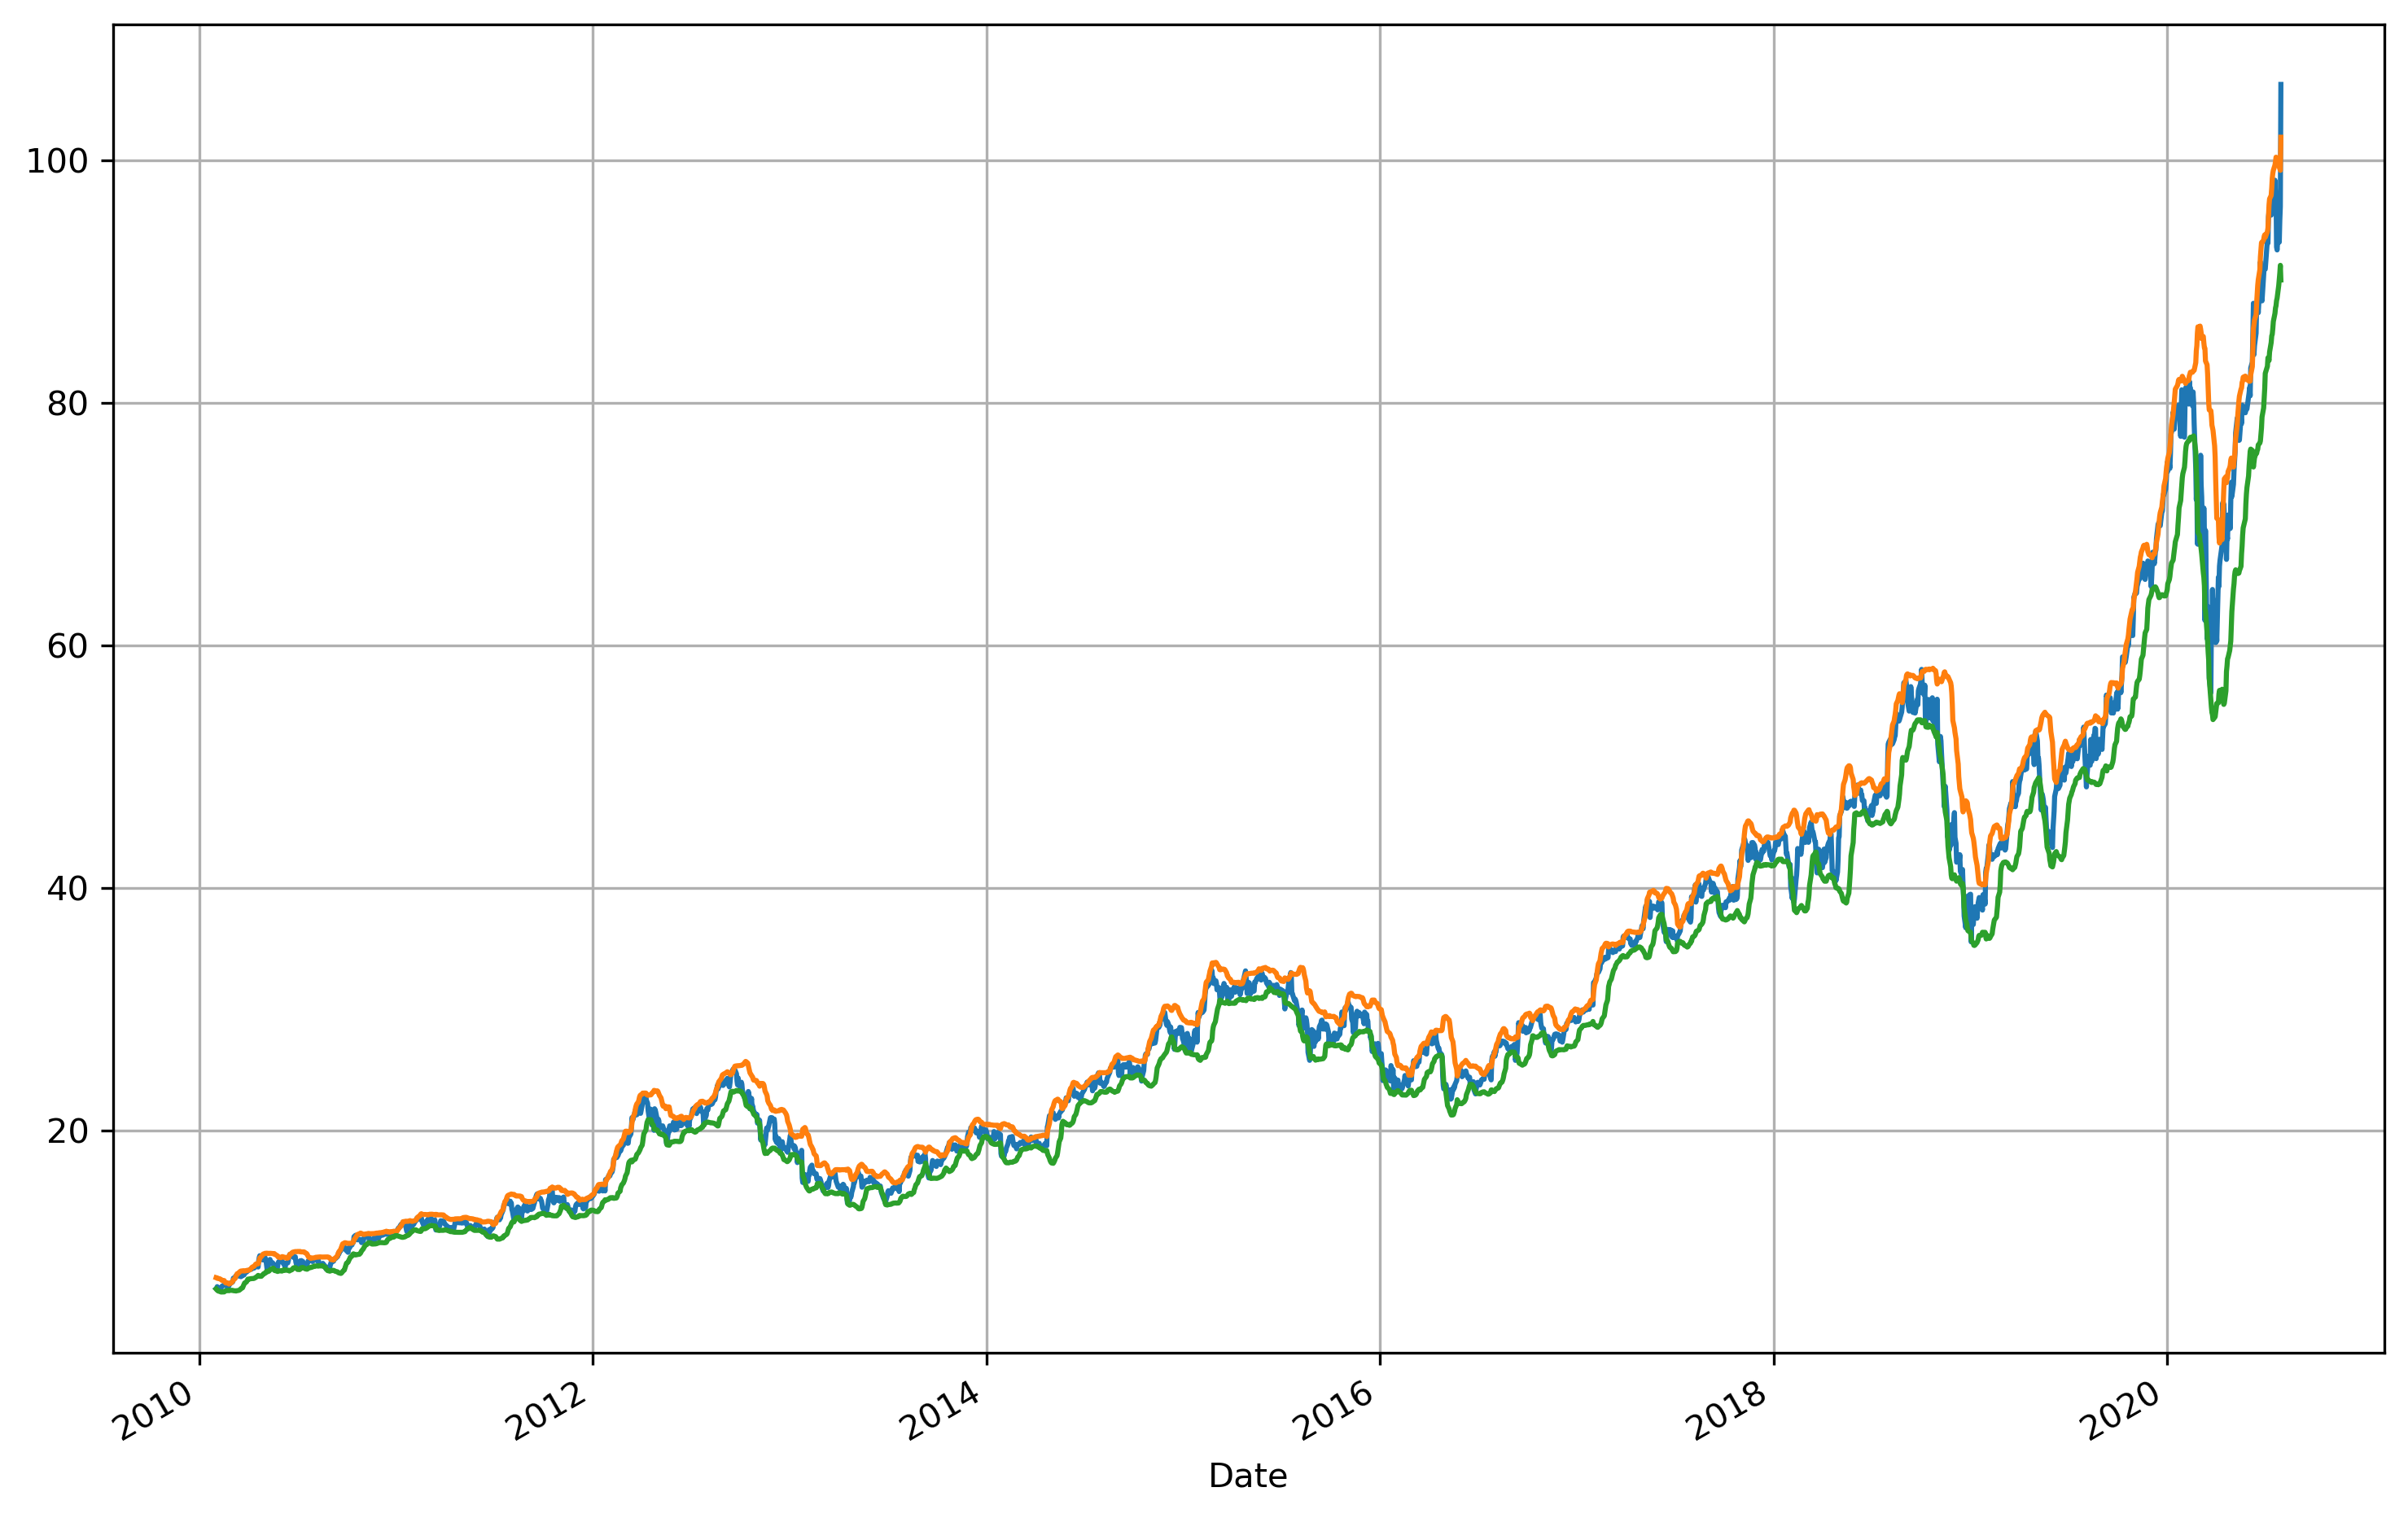

In [10]:
plt.figure(figsize = [12,8], dpi = 300)
dataset.close.plot()
dataset.BBU.plot()
dataset.BBL.plot().grid()

# <span style="color:green">Esempio pattern "Hammer"</span>

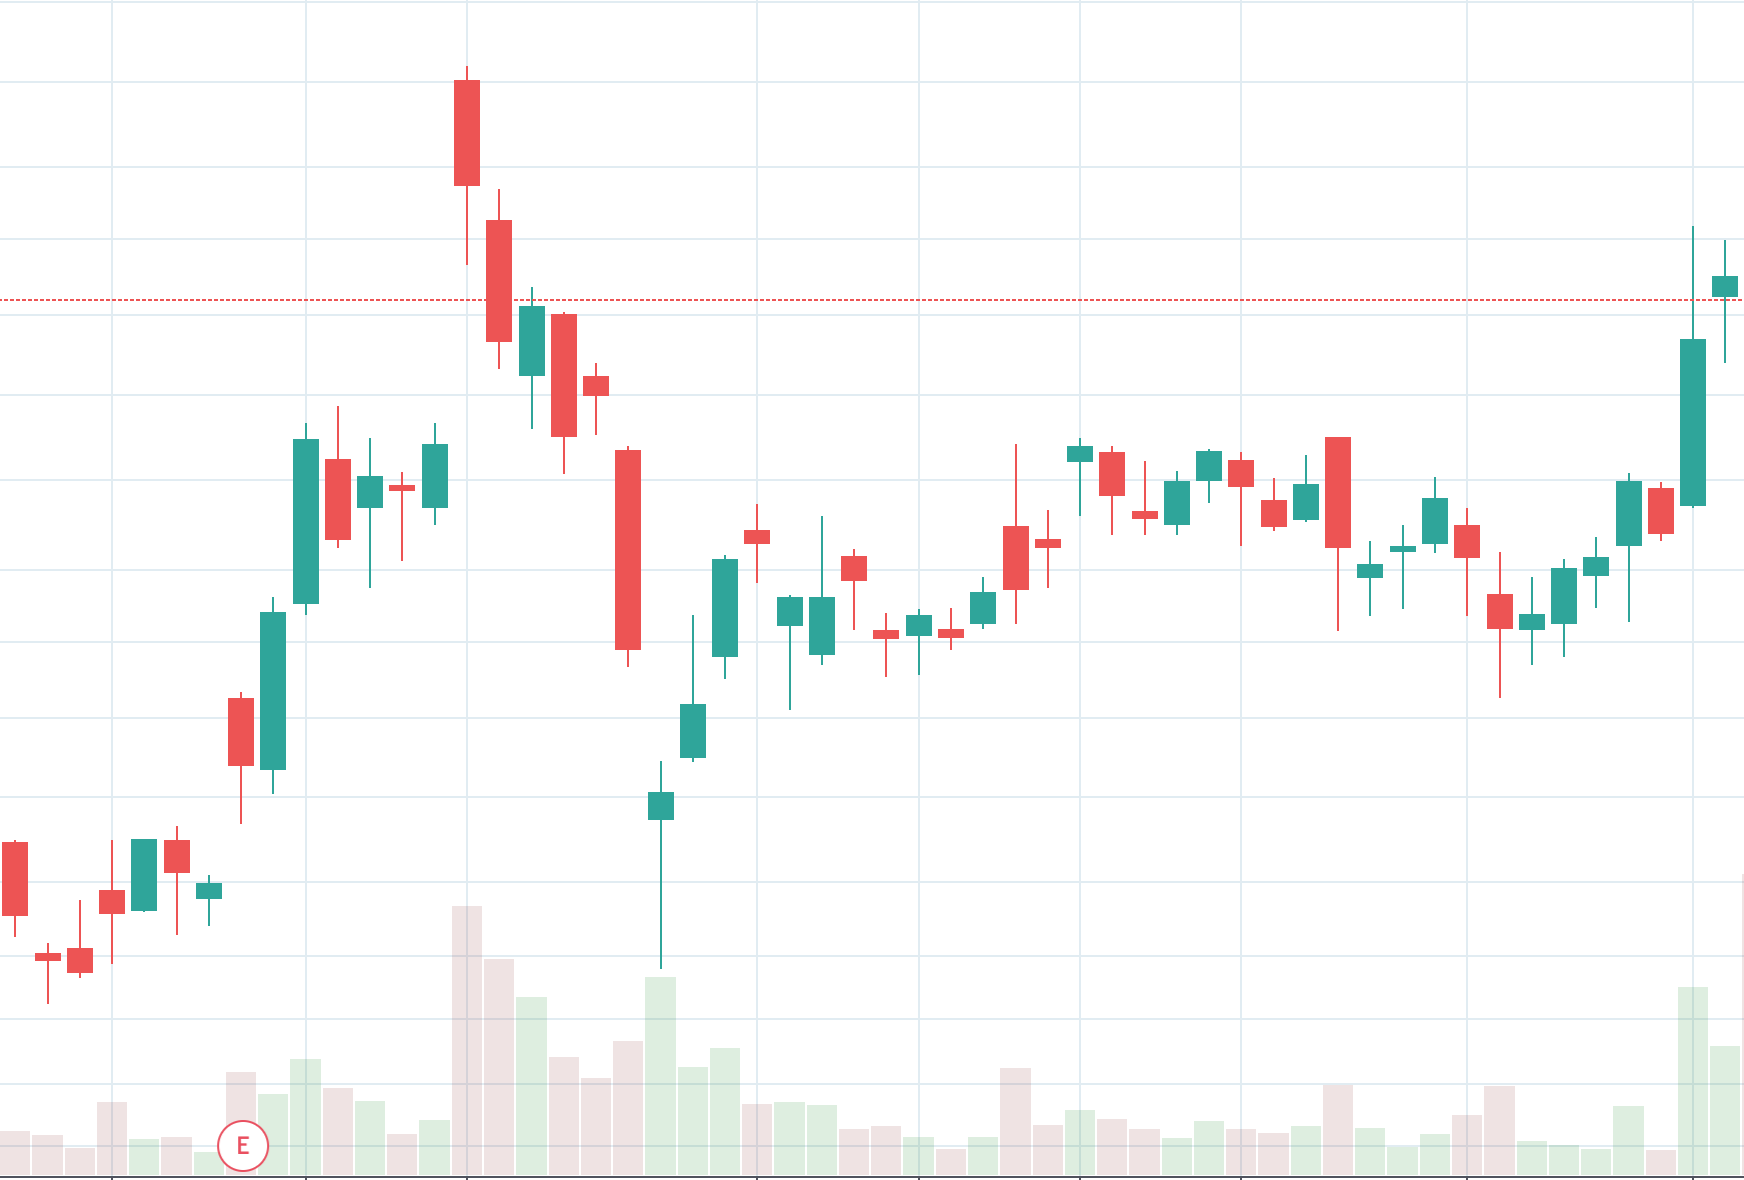

In [11]:
dataset["setup"] = (dataset.low < dataset.BBL) & (dataset.close > dataset.BBL) & \
                   (dataset.close_pos > 70) & (dataset.open_pos > 70) & (dataset.range_perc > 1)

dataset[dataset.setup == True]

,open,high,low,close,volume,range_perc,open_pos,close_pos,SMA20,STD20,BBU,BBL,setup
Date,,,,,,,,,,,,,
2010-05-06,9.07,9.22,7.12,8.79,1.285861e+09,29.494382,92.857143,79.523810,9.1185,0.364609,9.847718,8.389282,True
2010-08-27,8.63,8.66,8.41,8.63,5.483912e+08,2.972652,88.000000,88.000000,9.0060,0.281189,9.568378,8.443622,True
2012-10-09,22.81,22.87,22.27,22.71,8.385972e+08,2.694207,90.000000,73.333333,24.1255,0.730864,25.587229,22.663771,True
2012-11-16,18.76,18.93,18.06,18.85,1.266894e+09,4.817276,80.459770,90.804598,20.6705,1.286388,23.243276,18.097724,True
2015-07-07,31.47,31.54,30.94,31.42,1.877872e+08,1.939237,88.333333,80.000000,31.7510,0.265487,32.281973,31.220027,True
2015-10-01,27.27,27.41,26.83,27.40,2.557164e+08,2.161759,75.862069,98.275862,28.2285,0.596042,29.420584,27.036416,True
2015-12-16,27.77,28.00,27.20,27.83,2.249540e+08,2.941176,71.250000,78.750000,29.1225,0.664735,30.451970,27.793030,True
2015-12-21,26.82,26.84,26.39,26.83,1.903624e+08,1.705191,95.555556,97.777778,28.7100,1.018714,30.747429,26.672571,True
2018-02-09,39.27,39.47,37.56,39.10,2.826904e+08,5.085197,89.528796,80.628272,42.2780,2.064116,46.406232,38.149768,True


"st" = "strategy"

In [12]:
dataset["st1"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(0) - dataset.open, np.nan)
dataset["st2"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-1) - dataset.open, np.nan)
dataset["st3"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-2) - dataset.open, np.nan)
dataset["st4"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-3) - dataset.open, np.nan)
dataset["st5"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-4) - dataset.open, np.nan)
dataset["st6"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-5) - dataset.open, np.nan)
dataset["st7"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-6) - dataset.open, np.nan)
dataset["st8"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-7) - dataset.open, np.nan)
dataset["st9"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-8) - dataset.open, np.nan)
dataset["st10"] = np.where(dataset.setup.shift(1) == True, dataset.close.shift(-9) - dataset.open, np.nan)

dataset[dataset.setup.shift(1) == True]

,open,high,low,close,volume,range_perc,open_pos,close_pos,SMA20,STD20,...,st1,st2,st3,st4,st5,st6,st7,st8,st9,st10
Date,,,,,,,,,,,,,,,,,,,,,
2010-05-07,8.70,8.81,8.04,8.42,1.676018e+09,9.577114,85.714286,49.350649,9.1075,0.382676,...,-0.28,0.37,0.46,0.66,0.53,0.36,0.38,0.31,0.17,-0.21
2010-08-30,8.60,8.78,8.60,8.66,3.832892e+08,2.093023,0.000000,33.333333,8.9715,0.279083,...,0.06,0.08,0.34,0.41,0.64,0.61,0.79,0.80,0.81,0.94
2012-10-10,22.85,23.03,22.75,22.89,5.103560e+08,1.230769,35.714286,50.000000,24.0740,0.780697,...,0.04,-0.42,-0.36,-0.18,0.36,0.17,-0.26,-1.07,-0.21,-0.94
2012-11-19,19.31,20.27,19.28,20.20,8.233176e+08,5.134855,3.030303,92.929293,20.5510,1.207267,...,0.89,0.72,0.75,1.10,1.74,1.58,1.51,1.74,1.59,1.63
2015-07-08,31.12,31.16,30.64,30.64,2.430464e+08,1.697128,92.307692,0.000000,31.6905,0.362048,...,-0.48,-1.10,-0.30,0.30,0.28,0.58,1.01,1.28,1.90,1.57
2015-10-02,27.00,27.75,26.89,27.59,2.320792e+08,3.198215,12.790698,81.395349,28.2285,0.596042,...,0.59,0.69,0.83,0.69,0.38,1.03,0.90,0.95,0.55,0.97
2015-12-17,28.00,28.06,27.25,27.25,1.790912e+08,2.972477,92.592593,0.000000,29.0190,0.782996,...,-0.75,-1.49,-1.17,-1.19,-0.85,-0.99,-1.30,-0.82,-1.17,-1.68
2015-12-22,26.85,26.93,26.61,26.81,1.311576e+08,1.202555,75.000000,62.500000,28.5785,1.086982,...,-0.04,0.30,0.16,-0.15,0.33,-0.02,-0.53,-0.51,-1.17,-1.68
2018-02-12,39.62,40.97,39.38,40.68,2.432780e+08,4.037583,15.094340,81.761006,42.0985,2.037698,...,1.06,1.46,2.22,3.63,3.49,3.34,3.15,3.50,4.26,5.12


In [16]:
dataset[dataset.setup == True].index

DatetimeIndex(['2010-05-06', '2010-08-27', '2012-10-09', '2012-11-16',
               '2015-07-07', '2015-10-01', '2015-12-16', '2015-12-21',
               '2018-02-09', '2019-05-10', '2020-03-23'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [17]:
occurrences = dataset[dataset.setup == True].count()[0]
occurrences

11

In [18]:
results = []

In [19]:
profit = round(dataset.st1.sum(),2)
winning_trades = dataset[dataset.st1 > 0].count()[0]
loosing_trades = dataset[dataset.st1 <= 0].count()[0]
print("Strategy_1:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_1: 3.22 with 6 winning trades and 5 loosing trades


In [20]:
profit = round(dataset.st2.sum(),2)
winning_trades = dataset[dataset.st2 > 0].count()[0]
loosing_trades = dataset[dataset.st2 <= 0].count()[0]
print("Strategy_2:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_2: 3.14 with 8 winning trades and 3 loosing trades


In [21]:
profit = round(dataset.st3.sum(),2)
winning_trades = dataset[dataset.st3 > 0].count()[0]
loosing_trades = dataset[dataset.st3 <= 0].count()[0]
print("Strategy_3:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_3: 9.25 with 8 winning trades and 3 loosing trades


In [22]:
profit = round(dataset.st4.sum(),2)
winning_trades = dataset[dataset.st4 > 0].count()[0]
loosing_trades = dataset[dataset.st4 <= 0].count()[0]
print("Strategy_4:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_4: 8.71 with 8 winning trades and 3 loosing trades


In [23]:
profit = round(dataset.st5.sum(),2)
winning_trades = dataset[dataset.st5 > 0].count()[0]
loosing_trades = dataset[dataset.st5 <= 0].count()[0]
print("Strategy_5:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_5: 11.83 with 10 winning trades and 1 loosing trades


In [24]:
profit = round(dataset.st6.sum(),2)
winning_trades = dataset[dataset.st6 > 0].count()[0]
loosing_trades = dataset[dataset.st6 <= 0].count()[0]
print("Strategy_6:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_6: 9.98 with 8 winning trades and 3 loosing trades


In [25]:
profit = round(dataset.st7.sum(),2)
winning_trades = dataset[dataset.st7 > 0].count()[0]
loosing_trades = dataset[dataset.st7 <= 0].count()[0]
print("Strategy_7:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_7: 6.51 with 7 winning trades and 4 loosing trades


In [26]:
profit = round(dataset.st8.sum(),2)
winning_trades = dataset[dataset.st8 > 0].count()[0]
loosing_trades = dataset[dataset.st8 <= 0].count()[0]
print("Strategy_8:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_8: 7.08 with 7 winning trades and 4 loosing trades


In [27]:
profit = round(dataset.st9.sum(),2)
winning_trades = dataset[dataset.st9 > 0].count()[0]
loosing_trades = dataset[dataset.st9 <= 0].count()[0]
print("Strategy_9:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_9: 5.98 with 7 winning trades and 4 loosing trades


In [28]:
profit = round(dataset.st10.sum(),2)
winning_trades = dataset[dataset.st10 > 0].count()[0]
loosing_trades = dataset[dataset.st10 <= 0].count()[0]
print("Strategy_10:", profit, "with", winning_trades, "winning trades and", 
      loosing_trades, "loosing trades")
results.append(profit)

Strategy_10: 10.06 with 6 winning trades and 5 loosing trades


In [29]:
results

[3.22, 3.14, 9.25, 8.71, 11.83, 9.98, 6.51, 7.08, 5.98, 10.06]

In [30]:
plotting_results = pd.DataFrame(results, columns = ["results"], 
                                index = ["1 day", "2 days", "3 days", "4 days", "5 days", 
                                         "6 days","7 days", "8 days", "9 days", "10 days"])
plotting_results

,results
1 day,3.22
2 days,3.14
3 days,9.25
4 days,8.71
5 days,11.83
6 days,9.98
7 days,6.51
8 days,7.08
9 days,5.98
10 days,10.06


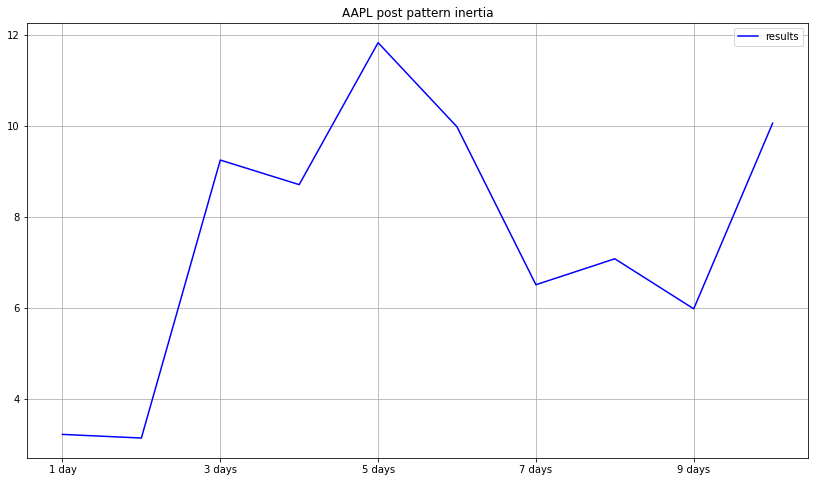

In [31]:
plotting_results.plot(figsize = [14,8], color = "blue").grid()
plt.title(ticker + " post pattern inertia");